In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('nhis 2003 - 2018.csv.gz')

In [4]:
df.head()

,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,REGION,LIVINGQTR,PERNUM,NHISPID,...,WRYMEDCST,WRYHOUS,WRYCCPAY,WRYHCCST,WRYRET,WRYCOLL,WRYBILLS,DEPFREQ,DEPRX,DEPFEELEVL
0,2003,1,5015,2,2003000002,3384,3,21,1,20030000020101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,1,5015,2,2003000002,3384,3,21,2,20030000020102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2,5133,1,2003000003,4848,2,21,1,20030000030101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2,5133,1,2003000003,4848,2,21,2,20030000030102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2,5133,1,2003000003,4848,2,21,3,20030000030103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['YEAR'].describe()

count    1.467895e+06
mean     2.010572e+03
std      4.523132e+00
min      2.003000e+03
25%      2.007000e+03
50%      2.011000e+03
75%      2.014000e+03
max      2.018000e+03
Name: YEAR, dtype: float64

In [6]:
df['YEAR'].isnull().sum()/len(df)

0.0

# Filter Respondands Ages 25-40

In [7]:
df['AGE'].describe()

count    1.467895e+06
mean     3.662429e+01
std      2.265610e+01
min      0.000000e+00
25%      1.700000e+01
50%      3.600000e+01
75%      5.400000e+01
max      8.500000e+01
Name: AGE, dtype: float64

In [8]:
df2 = df[df['AGE']>=25]

In [9]:
df2 = df2[df2['AGE']<=40]

In [10]:
df = df2
df['AGE'].describe()

count    314550.000000
mean         32.590974
std           4.624549
min          25.000000
25%          29.000000
50%          33.000000
75%          37.000000
max          40.000000
Name: AGE, dtype: float64

# Drop Missing Income Rows

In [11]:
df['INCOME_PERSON'] =df['INCIMPPOINT5']/df['PERNUM']

In [12]:
g = df['INCOME_PERSON'].isna().sum()/len(df)
print('{:.1%}'.format(g) +' percent of observations are missing income')

36.1% percent of observations are missing income


In [13]:
before = len(df)
df=df.dropna(subset=['INCOME_PERSON'])
after = len(df)
(after/before)-1

-0.36127483706882846

# Clean Mental Health Variables

In [14]:
df0 = df

In [15]:
result = df['YBARMENTAL'].value_counts().reset_index()
result.columns = ['YBARMENTAL values', 'YBARMENTAL counts']
result

,YBARMENTAL values,YBARMENTAL counts
0,0,116144
1,1,81092
2,2,2896
3,8,720
4,7,41
5,9,18


In [16]:
def addCols(col):
    temp =df[col].value_counts().reset_index()
    col1, col2 = col +' values', col+' counts'
    temp.columns = [col1, col2]
    result[col1], result[col2] = temp[col1], temp[col2]
    return temp

In [17]:
for column in ['SAWMENT','AWORTHLESS','ASAD']:
    addCols(column)
result

,YBARMENTAL values,YBARMENTAL counts,SAWMENT values,SAWMENT counts,AWORTHLESS values,AWORTHLESS counts,ASAD values,ASAD counts
0,0,116144,0,116144,6,116144,6,116144
1,1,81092,1,75737,0,74483,0,62601
2,2,2896,2,8082,1,4261,1,11700
3,8,720,8,866,2,2940,2,6453
4,7,41,7,66,8,1369,3,1698
5,9,18,9,16,3,845,8,1338


Lots of these variables have missing data. For some variables it's values [0,7,8,9], for other variables it's svalues [6,7,8,9]

In [18]:
OriginL = len(df)
OriginArray = df.index.array
OriginArray

<PandasArray>
[ 510976,  510979,  510982,  510983,  510999,  511000,  511004,  511009,
  511010,  511015,
 ...
 1467862, 1467867, 1467868, 1467869, 1467874, 1467877, 1467878, 1467882,
 1467883, 1467891]
Length: 200911, dtype: int64

In [19]:
LossTracker = pd.DataFrame(np.arange(72).reshape((24,3)))
LossTracker.rename(columns={0: "Variable Cleaned",1: "Obs Remaining", 2:"Dropped from Origin"}, inplace=True)
varCounter = 1
LossTracker.iloc[0,0] = "Starting Value"
LossTracker.iloc[0,1] = OriginL
LossTracker.iloc[0,2] = 0

In [20]:
LossTracker.head()

,Variable Cleaned,Obs Remaining,Dropped from Origin
0,Starting Value,200911,0
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


this resulting dataframe will be populated with mental health variables after missing values have been removed 

In [21]:
df0=df

In [22]:
k6List = ['AWORTHLESS','AEFFORT','AHOPELESS','ASAD','ANERVOUS','ARESTLESS']

In [23]:
obsRemaining = []
droppedFromOrigin = []
varUsed = []

for var in k6List  :
    varUsed.append(var)
    toDelete =  ((df0[(df0[var] == 6) | (df0[var] == 7) | (df0[var] == 8) | (df0[var] == 9)]).index)
    df =  df[(df[var] != 6) & (df[var] != 7) & (df[var] != 8) & (df[var] != 9)]
    obsRemaining.append(len(df))
    droppedFromOrigin.append(len(toDelete.intersection(OriginArray)))

In [24]:
otherMentalVars = ['YBARMENTAL','SAWMENT']

In [25]:
#varsNotUsed  = ['DEPFREQ','DEPFELEVL','DEPRX','WORFREQ','WORRX','WORFEELEVL']

In [26]:

for var in otherMentalVars  :
    varUsed.append(var)
    toDelete =  ((df0[(df0[var] == 0) | (df0[var] == 7) | (df0[var] == 8) | (df0[var] == 9)]).index)
    df =  df[(df[var] != 0) & (df[var] != 7) & (df[var] != 8) & (df[var] != 9)]
    obsRemaining.append(len(df))
    droppedFromOrigin.append(len(toDelete.intersection(OriginArray)))
    


In [27]:
LossTracker.iloc[1:len(varUsed)+1,0] = varUsed
LossTracker.iloc[1:len(obsRemaining)+1,1] = obsRemaining
LossTracker.iloc[1:len(droppedFromOrigin)+1,2] = droppedFromOrigin

In [28]:
LossTracker.head(9)

,Variable Cleaned,Obs Remaining,Dropped from Origin
0,Starting Value,200911,0
1,AWORTHLESS,83096,117815
2,AEFFORT,83013,117869
3,AHOPELESS,82994,117803
4,ASAD,82967,117775
5,ANERVOUS,82958,117769
6,ARESTLESS,82945,117792
7,YBARMENTAL,82640,116923
8,SAWMENT,82561,117092


The "Obs Remaining" column shows how many observations are remaining once this particular variable is cleaned (missing values removed). As you traverse down this column the marginal difference is small. We can infer that most of the survey respondants are missing all of these variables together, as opposed to one particular variable more than the others. 

the "Dropped from Origin" column shows how many observations would be remaining if this were the only variable that were cleaned. Again, there is not much change between variables indicating most respondants are missing all of these questions together, as opposed to ommiting one particular question. 

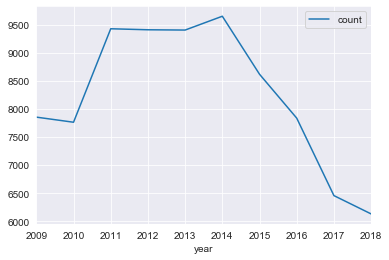

In [29]:
yeardf  = pd.DataFrame(df['YEAR'].value_counts())
yeardf = yeardf.reset_index()
yeardf = yeardf.rename(columns={'YEAR': "count",'index':'year'})
yeardf = yeardf.sort_values(by='year')
yeardf.plot(x='year',y='count')

Once the data is cleaned there is a steep drop-off in observations starting in 2014

# Create k6 Variable


In [30]:
k6vars = ['ANERVOUS', 'AHOPELESS', 'ARESTLESS','ASAD','AEFFORT','AWORTHLESS']
df[k6vars].describe()

,ANERVOUS,AHOPELESS,ARESTLESS,ASAD,AEFFORT,AWORTHLESS
count,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000
mean,0.664890,0.241458,0.676579,0.388949,0.563377,0.179516
std,0.964922,0.674992,1.039506,0.782330,1.022296,0.599907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [31]:
for var in k6vars:
    df[var]=df[var]+1

In [32]:
df[k6vars].describe()

,ANERVOUS,AHOPELESS,ARESTLESS,ASAD,AEFFORT,AWORTHLESS
count,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000
mean,1.664890,1.241458,1.676579,1.388949,1.563377,1.179516
std,0.964922,0.674992,1.039506,0.782330,1.022296,0.599907
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


this scoring of 1-5 matches the pdf you sent

In [33]:
df['k6'] = df['ANERVOUS']+ df['AHOPELESS']+ df['ARESTLESS']+ df['ASAD']+ df['AEFFORT']+ df['AWORTHLESS']

(array([53197., 11637.,  8630.,  3264.,  2046.,  2069.,   668.,   647.,
          186.,   217.]),
 array([ 6. ,  8.4, 10.8, 13.2, 15.6, 18. , 20.4, 22.8, 25.2, 27.6, 30. ]),
 <a list of 10 Patch objects>)

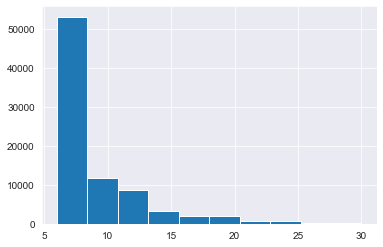

In [34]:
plt.hist(df['k6'])

In [35]:
df[['k6']].describe()

,k6
count,82561.000000
mean,8.714768
std,3.869370
min,6.000000
25%,6.000000
50%,7.000000
75%,10.000000
max,30.000000


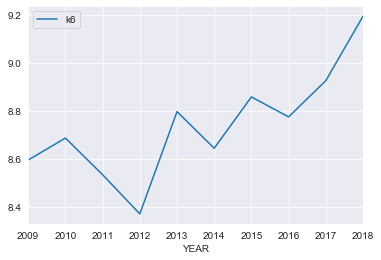

In [36]:
k6df  = pd.DataFrame(df.groupby(['YEAR'])['k6'].mean())
k6df = k6df.reset_index()
k6df.plot(x='YEAR', y='k6')

# k6 Analysis
 


In [37]:
df['SAWMENT'].value_counts()

1    74632
2     7929
Name: SAWMENT, dtype: int64

In [38]:
df['YBARMENTAL'].value_counts()

1    79718
2     2843
Name: YBARMENTAL, dtype: int64

In [39]:
dfSaw = df[df['SAWMENT']==2]
dfNoSaw = df[df['SAWMENT']==1]
dfYbar  = df[df['YBARMENTAL']==2]
dfNoYbar = df[df['YBARMENTAL']==1]

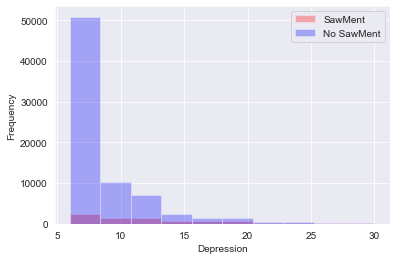

<Figure size 648x576 with 0 Axes>

In [40]:
plt.hist(dfSaw['k6'], bins=10, color='r', alpha=0.3, label='SawMent')
plt.hist(dfNoSaw ['k6'], bins=10, color='b', alpha=0.3, label='No SawMent')
plt.legend()
plt.xlabel("Depression")
plt.ylabel("Frequency")
plt.figure(figsize=(9,8))
plt.rcParams["figure.figsize"] = [9,6]

Comparing the "SAWMENT" variable via overlapping histograms is difficult to interpreate, as the count of people who saw a mental health professional is dwarfed by the count of people who did not. 

In [41]:
dfList = [dfSaw, dfNoSaw, dfYbar, dfNoYbar]

means = []
stDevs = []
myIndex = []
for frame in dfList:
    means.append(frame['k6'].mean())
    stDevs.append(frame['k6'].std())
rdf = pd.DataFrame({'mean k6':means, 'standard dev k6':stDevs})
myIndex = ['Sawment', 'No Sament','YBar','No YBar']
rdf.index = myIndex
rdf

,mean k6,standard dev k6
Sawment,12.357422,5.477330
No Sament,8.327768,3.437469
YBar,14.859655,5.914325
No YBar,8.495622,3.586678


"Sawment" measures people who saw a mental health professional, "YBar" measures people who say they cannot afford a mental health professional. 
This table shows poeple with higher k6 scores are more likley to seek a mental health professional and more likely to claim they cannot afford mental health services

In [42]:
df['YBARMENTAL'] = df['YBARMENTAL']-1

In [43]:
df['YBARMENTAL'].value_counts()

0    79718
1     2843
Name: YBARMENTAL, dtype: int64

In [44]:
df['SAWMENT'] = df['SAWMENT']-1

In [45]:
df['SAWMENT'].value_counts()

0    74632
1     7929
Name: SAWMENT, dtype: int64

In [46]:
count_series = df.groupby(['YBARMENTAL','SAWMENT']).size()
newdf = count_series.to_frame(name='count').reset_index()
newdf

,YBARMENTAL,SAWMENT,count
0,0,0,72930
1,0,1,6788
2,1,0,1702
3,1,1,1141


You also had mentioned analyzing the number of YBARMENTAL per SAWMENT. According to the table above, roughly half of respondants with YBARMENTAL also SAWMENT

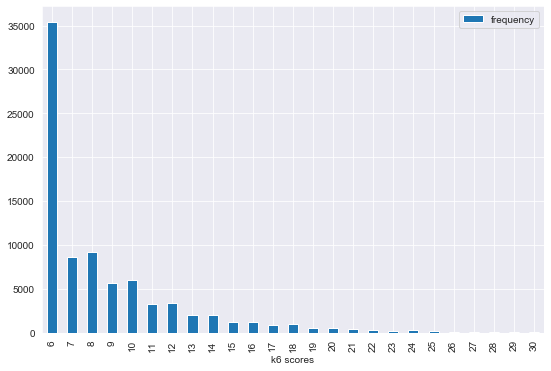

In [49]:
k6Series = pd.DataFrame({'frequency':df['k6'].value_counts().values, 'k6 scores':df['k6'].value_counts().index})
k6Series = k6Series.sort_values(by=['k6 scores'])
graph = k6Series.plot.bar(x='k6 scores',y='frequency')

the vast majority of respondants answer 1 on every k6 question, indicating no issue with  thier mental health. they are likely not being truthful in answering survey questions, but its the best we've got. 

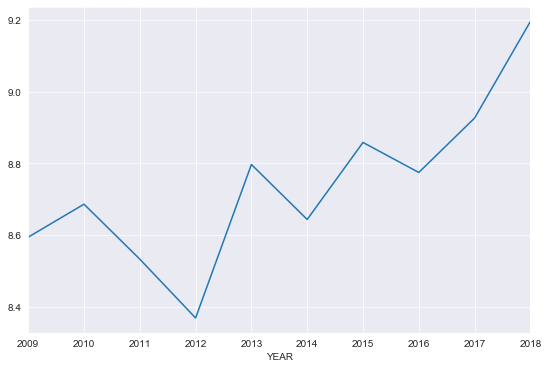

In [50]:
df.groupby(['YEAR'])['k6'].mean().plot()

the mean k6 declined steadily between 2010 and 2012 and has been recovering since. 

In [51]:
k6vars = ['ANERVOUS', 'AHOPELESS', 'ARESTLESS','ASAD','AEFFORT','AWORTHLESS']
df[k6vars].describe()

,ANERVOUS,AHOPELESS,ARESTLESS,ASAD,AEFFORT,AWORTHLESS
count,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000,82561.000000
mean,1.664890,1.241458,1.676579,1.388949,1.563377,1.179516
std,0.964922,0.674992,1.039506,0.782330,1.022296,0.599907
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


  ERROR: Could not find a version that satisfies the requirement v3.0.3 (from versions: none)
ERROR: No matching distribution found for v3.0.3


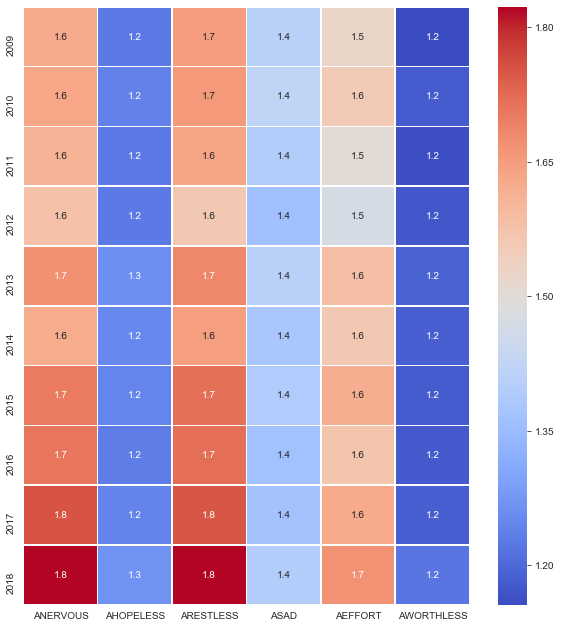

In [55]:
#create resulting dataframe 
k6df = pd.DataFrame(np.arange(96).reshape(16,6))
k6df.columns = k6vars
k6df.index = list(range(2003,2019))

#generate mean by year of each variable 
populate = []
for var in k6vars:
    populate.append(list(df.groupby(['YEAR'])[var].mean()))
    
k6df = k6df.tail(10) 

#populate resulting dataframe
for i in range(len(populate)):
    k6df.iloc[:,i] = populate[i]
    
#generate heatmap
f, ax  = plt.subplots(figsize=(10,11))
sns.heatmap(k6df, cmap='coolwarm', annot=True, linewidths = .5)

#reformat top and bottom 
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show() 

 This heatmap shows the mean value of each k6 variable over time. Some variables, like AHOPELESS and AWORTHLESS, ahve been stable over time while ANERVOUS and ARESTLESS have increaed in recent years. 

In [208]:
dfk6 = dfk6.reset_index()
dfInc = dfInc.reset_index()
dfInc = dfInc[['YBARMENTAL', 'SAWMENT','count','mean','50%']]

In [209]:
df2 = dfInc.rename(columns = {'mean':'mean income','50%':'median income'})
df2['k6 mean'] = dfk6['mean']
df2

,YBARMENTAL,SAWMENT,count,mean income,median income,k6 mean
0,0,0,72930.0,48100.243779,37000.0,8.195996
1,0,1,6788.0,47232.754182,35000.0,11.714791
2,1,0,1702.0,28172.994537,21000.0,13.974148
3,1,1,1141.0,32255.373424,24007.0,16.180543


Those that say they would like to see a mental health professional but could not afford one (YBARMENTAL of 1) have a mean income much lower than those who could sawy they could afford a mental health professional. Respondants who havent seen a mental health professional and can't afford one have the lowest mean income. 
k6 scores increase steadily with each row 


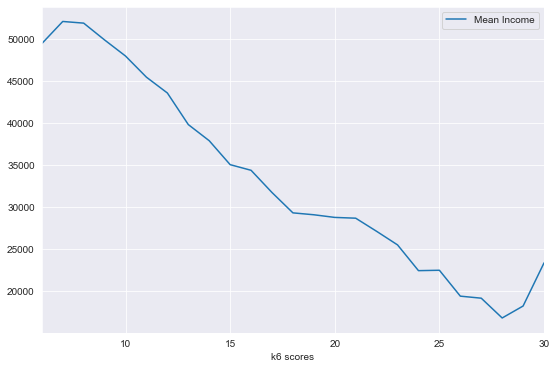

In [56]:
incomeSeries = df.groupby(['k6'])['INCOME_PERSON'].mean()
incomeDF = pd.DataFrame({'Mean Income':incomeSeries.values, 'k6 scores':incomeSeries.index})
incomeDF = incomeDF.sort_values(by=['k6 scores'])
graph = incomeDF.plot.line(x='k6 scores',y='Mean Income')

Over the full dataset we see a consistent decline in income is associated with high k6 scores

# Family Income Analysis

In [57]:
df = df[df['HIPUBCOVE']!=9]
df['HIPUBCOVE'].value_counts()

1    70744
2    11538
Name: HIPUBCOVE, dtype: int64

In [58]:
df['HINOTCOVE'].value_counts()

1    63967
2    18315
Name: HINOTCOVE, dtype: int64

In [59]:
print('compare family income per person against [personal income] varaible (EARNIMPOINT5)')

compare family income per person against [personal income] varaible (EARNIMPOINT5)


In [60]:
dfr = pd.DataFrame(df['INCOME_PERSON'].describe())
dfr['personal income'] = pd.DataFrame(df['EARNIMPOINT5'].describe())
dfr.rename(columns={'INCOME_PERSON':'family income per person'})

,family income per person,personal income
count,82282.00000,82282.000000
mean,47472.07737,32802.759218
std,41158.09331,30741.356165
min,0.00000,0.000000
25%,18500.00000,8000.000000
50%,36000.00000,26000.000000
75%,63749.00000,48000.000000
max,246000.00000,149000.000000


median income in US is 31,786 (which closely matches family income per person)
the mean income in the US is 48,150 (which which also cosley mathces family income per person). This variable seems to be the best descriptor of income going foreward

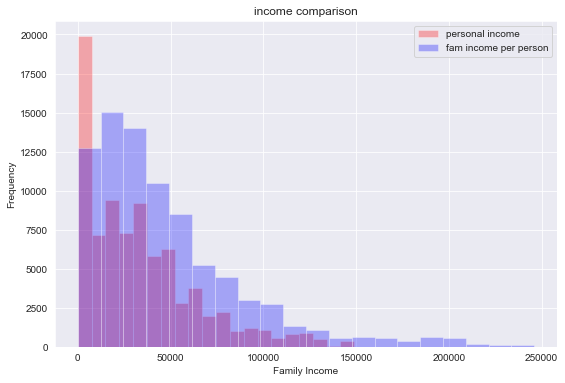

<Figure size 648x576 with 0 Axes>

In [61]:
plt.hist(df[ 'EARNIMPOINT5'], bins=20, color='r', alpha=0.3, label='personal income')
plt.hist(df[ 'INCOME_PERSON'], bins=20, color='b', alpha=0.3, label='fam income per person')
plt.legend()
plt.xlabel("Family Income")
plt.ylabel("Frequency")
plt.title("income comparison")
plt.figure(figsize=(9,8))
plt.rcParams["figure.figsize"] = [9,6]

thier distributions look similar 

In [62]:
x = len(df[df['INCOME_PERSON']==0])/len(df)

print('{:.1%}'.format(x) +' of family income is zero')

0.7% of family income is zero


In [63]:
x = len(df[df['EARNIMPOINT5']==0])/len(df)

print('{:.1%}'.format(x) +' of personal income is zero')

16.8% of personal income is zero


going forward, we will drop zeros and use family income per person

In [64]:
df = df[df['INCOME_PERSON']!=0]

In [65]:
df['INCOME_PERSON'].describe()

count     81695.000000
mean      47813.176696
std       41107.801018
min           0.142857
25%       19000.000000
50%       36000.000000
75%       64000.000000
max      246000.000000
Name: INCOME_PERSON, dtype: float64

# Incorporate Moderator with Family Income Per Person 

In [66]:
edf = pd.DataFrame(df['INCOME_PERSON'].describe())
edf

,INCOME_PERSON
count,81695.000000
mean,47813.176696
std,41107.801018
min,0.142857
25%,19000.000000
50%,36000.000000
75%,64000.000000
max,246000.000000


In [67]:
quartile25 = int(edf.iloc[4])
median = int(edf.iloc[5])
quartile75= int(edf.iloc[6])

In [68]:
dfq1 = df[df['INCOME_PERSON']<quartile25]
dfq2 = df[(df['INCOME_PERSON']>quartile25) & (df['INCOME_PERSON']<median)]
dfq3 = df[(df['INCOME_PERSON']>median) & (df['INCOME_PERSON']<quartile75)]
dfq4 = df[df['INCOME_PERSON']>quartile75]


In [69]:
deplist = []
for i in ([dfq1, dfq2, dfq3, dfq4]):
    deplist.append((i['k6'].mean()))
rdf = pd.DataFrame({'mean k6': deplist})
rdf.index = ['q1','q2','q3','q4']
rdf

,mean k6
q1,9.700744
q2,8.805325
q3,8.330862
q4,7.981891


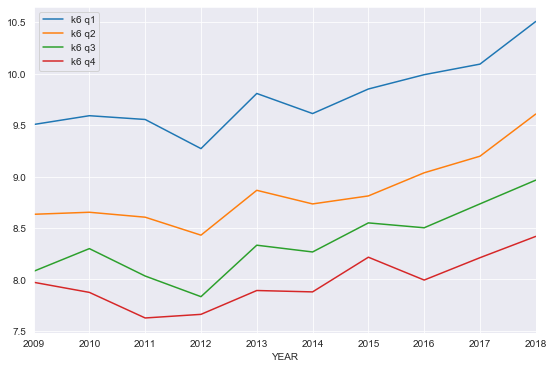

In [70]:
incomeSeries = dfq1.groupby(['YEAR'])['k6'].mean()
incomeDF = pd.DataFrame({'k6 q1':incomeSeries.values})
incomeDF['k6 q2'] = dfq2.groupby(['YEAR'])['k6'].mean().values
incomeDF['k6 q3']=  dfq3.groupby(['YEAR'])['k6'].mean().values
incomeDF['k6 q4']=  dfq4.groupby(['YEAR'])['k6'].mean().values
incomeDF.index = incomeSeries.index
incomeDF.plot()

The gap in k6 scores by income quartile does not change year to year 

# Incorporating Insurance

In [71]:
insList = []
for i in ([dfq1, dfq2, dfq3, dfq4]):
    insList.append(len(i[i['HINOTCOVE']==1])/len(i))
insList

[0.5874937965260546,
 0.7140973630831643,
 0.8634633447031489,
 0.9469990675761888]

In [72]:
ageList= []
for i in ([dfq1, dfq2, dfq3, dfq4]):
    ageList.append(i['AGE'].mean())
ageList

[31.755186104218364, 31.90339756592292, 32.486430372237876, 33.657456936742406]

In [73]:
pubList = []
for i in ([dfq1, dfq2, dfq3, dfq4]):
    pubList.append(len(i[i['HIPUBCOVE']==2])/len(i))
pubList

[0.34089330024813896,
 0.150709939148073,
 0.05032379257501607,
 0.015753054914854982]

In [74]:
rdf = pd.DataFrame({'percentage of people insured':insList, 
                    'percentage on public ins':pubList ,
                    'mean age':ageList,
                   'max income':[quartile25, median,  quartile75, df['INCOME_PERSON'].max() ]})
rdf.index=['q1', 'q2', 'q3', 'q4']
rdf

,percentage of people insured,percentage on public ins,mean age,max income
q1,0.587494,0.340893,31.755186,19000.0
q2,0.714097,0.150710,31.903398,36000.0
q3,0.863463,0.050324,32.486430,64000.0
q4,0.946999,0.015753,33.657457,246000.0


In [75]:
count_series = dfq1.groupby(['YBARMENTAL','HINOTCOVE']).size()
newdf = count_series.to_frame(name='count').reset_index()


In [76]:
count_series = dfq1.groupby(['YBARMENTAL','HIPUBCOVE','HINOTCOVE']).size()
newdf = count_series.to_frame(name='count').reset_index()


In [77]:
counts = list(newdf['count'])
totals = []
for i in range(3):
    totals.append(counts[i]+counts[i+3])
for number in range(3):
    totals.append(totals[number])
percents = []
for i in range(len(counts)):
    percents.append(counts[i]/totals[i])
newdf['percent of ybar'] = percents


In [78]:
def y_n(your_df):
    haspublic = []
    for number in list(your_df['HIPUBCOVE']):
        if number==2:
            haspublic.append('y')
        else:
            haspublic.append('n')

    hasprivate = []
    for number in list(your_df['HINOTCOVE']):
        if number==1:
            hasprivate.append('y')
        else:
            hasprivate.append('n')
    your_df['HIPUBCOVE']=haspublic
    your_df['HINOTCOVE']=hasprivate

In [79]:
y_n(newdf)

In [80]:
newdf.rename(columns={'HIPUBCOVE':'has public ins', 'HINOTCOVE':'has private ins'})

,YBARMENTAL,has public ins,has private ins,count,percent of ybar
0,0,n,y,4774,0.960757
1,0,n,n,7662,0.921800
2,0,y,y,6559,0.954870
3,1,n,y,195,0.039243
4,1,n,n,650,0.078200
5,1,y,y,310,0.045130


Very few people on private insurance say they cannot afford mental health care. the majority of people who cannot afford care have no insurance

In [81]:
insdf = pd.DataFrame(dfq1.groupby(['HIPUBCOVE','HINOTCOVE']).size())
insdf.reset_index(inplace=True)
y_n(insdf)

insdf = insdf.rename(columns={'HIPUBCOVE':'has public ins', 'HINOTCOVE':'has private ins', 0:'count'})
insdf

,has public ins,has private ins,count
0,n,y,4969
1,n,n,8312
2,y,y,6869


40% are describe themselves as not having any insurance

In [82]:
insdf = pd.DataFrame(df.groupby(['HIPUBCOVE','HINOTCOVE'])['AGE'].mean())
insdf.reset_index(inplace=True)
y_n(insdf)        
insdf = insdf.rename(columns={'HIPUBCOVE':'has public ins', 'HINOTCOVE':'has private ins','AGE':'mean age'})
insdf

,has public ins,has private ins,mean age
0,n,y,32.614925
1,n,n,32.172349
2,y,y,32.148621


the mean age does not change much for those who do or do not have insurance

# Logistic Regression 

In [257]:
df['YBARMENTAL'].value_counts()

0    78907
1     2788
Name: YBARMENTAL, dtype: int64

The Following steps were taken to get these variables regression-ready:
1. take the log of income to fix the scale and distribution 
2. take the square root of k6 
3. create an interaction term using the z scores of both root(k6) and log(income) 

In [258]:
import statsmodels.api as sm

In [259]:
df = df[df['INCOME_PERSON']!=0]
len(df)

81695

In [260]:
df['logged_income'] = np.log(df['INCOME_PERSON'])

In [262]:
original_len = len(df)
df = df.dropna(subset=['INCOME_PERSON'])


In [263]:
len(df)/original_len

1.0

In [264]:
import math

In [265]:
rootArray = []
for ob in list(df['k6']):
    rootArray.append(math.sqrt(ob))

In [266]:
df['k6_root'] = rootArray
df[['k6','k6_root']].head()

,k6,k6_root
510976,7,2.645751
510983,6,2.449490
511024,9,3.000000
511057,8,2.828427
511060,8,2.828427


(array([35077.,  8525.,  9081.,  5602.,  5933.,  3238.,  3364.,  1944.,
         1978.,  1241.,  1165.,  1835.,   538.,   503.,   651.,   219.,
          411.,   114.,   129.,   147.]),
 array([2.44948974, 2.60087653, 2.75226333, 2.90365012, 3.05503691,
        3.2064237 , 3.35781049, 3.50919728, 3.66058408, 3.81197087,
        3.96335766, 4.11474445, 4.26613124, 4.41751803, 4.56890483,
        4.72029162, 4.87167841, 5.0230652 , 5.17445199, 5.32583878,
        5.47722558]),
 <a list of 20 Patch objects>)

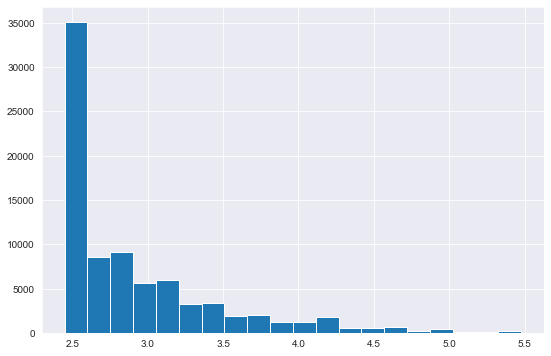

In [267]:
plt.hist(df['k6_root'], bins=20)

In [268]:
myMean = df['k6_root'].mean()
mySD = df['k6_root'].std()
rootArray = []
for ob in list(df['k6_root']):
    rootArray.append((ob-myMean)/mySD)
df['k6_root_Z'] = rootArray

In [269]:
myMean = df['logged_income'].mean()
mySD = df['logged_income'].std()
rootArray = []
for ob in list(df['logged_income']):
    rootArray.append((ob-myMean)/mySD)
df['logged_income_Z'] = rootArray

In [270]:
df['interaction'] =df['logged_income_Z'] * df['k6_root_Z']

In [272]:
len(df[df['k6']==6])/len(df)

0.4293653222351429

In [273]:
df_reg = df[df['YEAR']<2014]

In [274]:
df_reg = df_reg.append(df[df['YEAR']>2014])

In [275]:
df_reg['YEAR'].value_counts()

2011    9339
2012    9313
2013    9300
2015    8518
2009    7790
2016    7754
2010    7668
2017    6391
2018    6077
Name: YEAR, dtype: int64

In [276]:
df_reg['YEAR_binary'] = np.where(df_reg['YEAR']>2014,1,0)

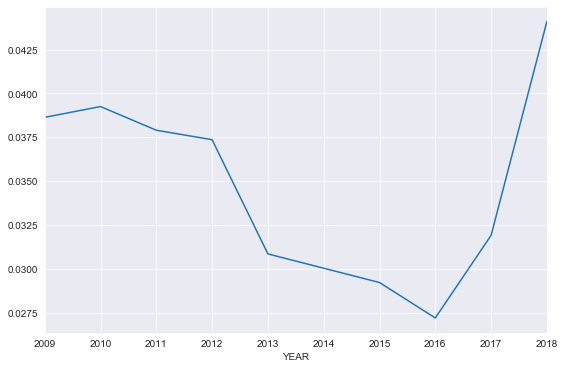

In [277]:
df_reg.groupby(['YEAR'])['YBARMENTAL'].mean().plot()

In [278]:
pd.DataFrame(df_reg.groupby(['YEAR_binary'])['YBARMENTAL'].mean())

,YBARMENTAL
YEAR_binary,
0,0.036651
1,0.032429


In [279]:
df_reg[df_reg['YEAR_binary']==0]['YEAR'].value_counts()

2011    9339
2012    9313
2013    9300
2009    7790
2010    7668
Name: YEAR, dtype: int64

In [286]:
IV = ['logged_income', 'k6_root', 'interaction','YEAR_binary', 'HINOTCOVE' ]
DV = ['YBARMENTAL']
X = df_reg[IV]
y = df_reg[DV]
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.129653
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.145     
Dependent Variable: YBARMENTAL       AIC:              18718.9908
Date:               2020-05-07 12:20 BIC:              18764.9233
No. Observations:   72150            Log-Likelihood:   -9354.5   
Df Model:           4                LL-Null:          -10939.   
Df Residuals:       72145            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
logged_income    -0.7573   0.0111 -67.9503 0.0000 -0.7791 -0.7354
k6_root           1.3473   0.0302  44.6540 0.0000  1.2881  1.4064


All variables are significant except for insurance(HINOTCOVE). The indpendent varialbe measures those who said they wanted mental health care but could nto afford it. If your income increases you are more likely to be able to afford care. As your mental health gets words(increase in k6) you are less likely to be able to afford care. the interactin between these terms is significant. Most interesting is the negative coefficient on the YEAR_binary variable. this variable is 0 before 2014 and 1 after. 2014 was picked as the year the Affordable Care Act was implemented. The negative coeffiecnt indicates that people were more likely to afford mental health care as a result of the ACA implementation. 


# Health Insurance Comparison 2010 - 2016

In [287]:
dfByYear = pd.DataFrame(df.groupby(['YEAR'])['YBARMENTAL'].mean())
dfByYear.reset_index()

,YEAR,YBARMENTAL
0,2009,0.038639
1,2010,0.039254
2,2011,0.037906
3,2012,0.037367
4,2013,0.030860
5,2014,0.027763
6,2015,0.029232
7,2016,0.027212
8,2017,0.031920
9,2018,0.044101


In [288]:
df['HINOTCOVE'] = df['HINOTCOVE']-1

In [289]:
dfByYear['Mean Ins'] = df.groupby(['YEAR'])['HINOTCOVE'].mean().values

In [290]:
dfByYear

,YBARMENTAL,Mean Ins
YEAR,,
2009,0.038639,0.271759
2010,0.039254,0.267866
2011,0.037906,0.264268
2012,0.037367,0.270160
2013,0.030860,0.260215
2014,0.027763,0.220010
2015,0.029232,0.175276
2016,0.027212,0.140831
2017,0.031920,0.146612


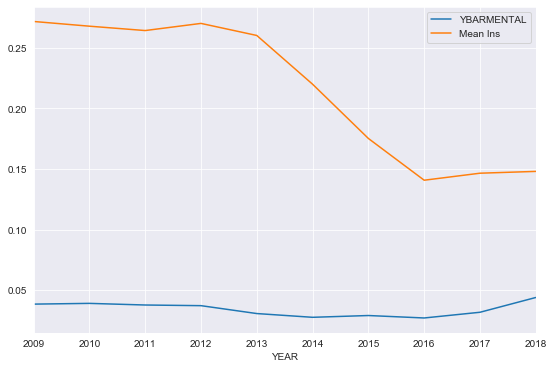

In [291]:
dfByYear.plot()

This last graph shows that, as fewer people have insurance, the percentage of them that say they cannot afford health insurance increases. 